# PCA Transform

### = Read In CSV...

In [26]:
import pandas as pd

df = pd.read_csv("sysco.csv")

df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### = Scale By Log...
- Just a reminder...
- The data has been scaled to a more normal distribution using the log function.
- The data has had necessary outliers removed.

In [28]:
import numpy as np

df = np.log(df)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2.245688,2.216519,2.189501,1.680078,2.065765,1.973933
1,2.181747,2.218242,2.215521,2.011458,2.091809,2.012516
2,2.169817,2.206450,2.191307,2.052238,2.099866,2.193607
3,2.250542,1.958225,2.122001,2.170730,1.829137,2.013416
4,2.305218,2.151297,2.183977,2.112945,2.012591,2.146343


# PCA Transform...
- [PCA Tranformation Interactive Demo](http://setosa.io/ev/principal-component-analysis/)
- Here we are using PCA to reduce 6 dimensions of data down to 2. 

In [52]:
%matplotlib inline

from sklearn.decomposition import PCA

# Fit a PCA classifier with the same number of dimensions as features
pca = PCA(n_components=2)
pca.fit(df)

transformed_pca = pca.transform(df)

transformed_df = pd.DataFrame(transformed_pca)

transformed_df.head()

,0,1
0,0.272160,0.001293
1,0.285712,0.108435
2,0.323959,0.251496
3,-0.063184,0.238596
4,0.207194,0.322409


### - 2D Visualization...
- If we look at a scatter matrix of the data after reducing to 2 dimensions, we can see that two humps in Dimension 1 that seem to indicate the presence of two distinct groups within the distribution. Remember, the 1st pca component generally correlates with spending in Milk, Grocery, Detergents_Paper.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cc330d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cf59a50>]], dtype=object)

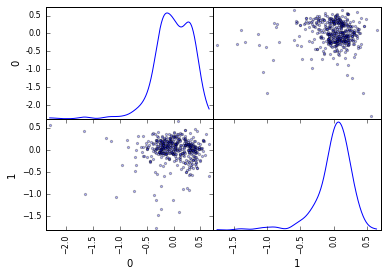

In [55]:
pd.scatter_matrix(transformed_df, alpha=0.3, figsize = (6,4), diagonal='kde')

### = Inverse: PCA Transform...
- Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.
- Remember, transform first, exponentiate second.

In [57]:
# Inverse transform
returned_df = pca.inverse_transform(transformed_df)

# Return inverse transform data to a DataFrame
returned_df = pd.DataFrame(returned_df, columns=df.keys())

# Update the DataFrames Index with a dimension labels
segments = ['Segment {}'.format(i) for i in range(0,len(returned_df))]
returned_df.index = segments

returned_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,2.132041,2.165744,2.225828,1.945210,2.101207,1.941357
Segment 1,2.189420,2.172917,2.223412,1.982217,2.097627,2.024611
Segment 2,2.264981,2.188461,2.227855,2.029690,2.109544,2.141070
Segment 3,2.278211,2.073474,2.081414,2.062366,1.790571,2.029749
Segment 4,2.309526,2.155987,2.178399,2.066294,2.003002,2.163134


### = Inverse: Log...
- Apply the inverse function of np.log to log_centers using np.exp and assign the true centers to true_centers.

In [58]:
# The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. 
exp_data = np.exp(returned_df)
exp_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8.432058,8.721084,9.261147,6.995098,8.176031,6.968199
Segment 1,8.930029,8.783869,9.238796,7.258819,8.146817,7.573161
Segment 2,9.630946,8.921472,9.279943,7.611728,8.244485,8.508533
Segment 3,9.759208,7.952400,8.015792,7.864557,5.992876,7.612177
Segment 4,10.069651,8.636412,8.832156,7.895511,7.411268,8.698351
